In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('unpopular_songs.csv')
df = df.head(2000)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id
0,0.530,0.770,4,-6.633,0,0.0389,0.284,0.501000,0.744,0.623,120.144,225696,False,2,No Regrets,James Reeder,6f2c4a9lNx8aowZJngv7cJ
1,0.565,0.730,1,-6.063,1,0.0730,0.365,0.000000,0.237,0.511,130.026,158093,False,2,Wild Life,James Reeder,3fTs52jsDzSuVLsifxNKO8
2,0.427,0.546,4,-8.727,1,0.0849,0.539,0.015200,0.368,0.435,78.345,167262,False,2,Fangs,James Reeder,6NPafqavrv0icaIHMQnXDy
3,0.421,0.531,7,-5.516,1,0.0262,0.706,0.000208,0.110,0.383,85.080,236832,False,2,Afterburner,James Reeder,3vGmhxveURgmlZStvo0uc1
4,0.537,0.804,8,-7.378,0,0.1570,0.379,0.000489,0.323,0.543,139.950,239400,False,2,Hellfire Rising,James Reeder,4O2qRbfCHzMMgfbw9DBdGf


In [22]:
df['overall_popularity'] = 'popular'
df.loc[df['popularity'] <= 5, 'overall_popularity'] = '1'
df.loc[(df['popularity'] >=6) & (df['popularity'] <= 10), 'overall_popularity'] = '2'
df.loc[df['popularity'] >= 11, 'overall_popularity'] = '3'


df['overall_popularity'] = df['overall_popularity'].astype(int)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,explicit,popularity,track_name,track_artist,track_id,overall_popularity
0,0.530,0.770,4,-6.633,0,0.0389,0.284,0.501000,0.744,0.623,120.144,225696,False,2,No Regrets,James Reeder,6f2c4a9lNx8aowZJngv7cJ,1
1,0.565,0.730,1,-6.063,1,0.0730,0.365,0.000000,0.237,0.511,130.026,158093,False,2,Wild Life,James Reeder,3fTs52jsDzSuVLsifxNKO8,1
2,0.427,0.546,4,-8.727,1,0.0849,0.539,0.015200,0.368,0.435,78.345,167262,False,2,Fangs,James Reeder,6NPafqavrv0icaIHMQnXDy,1
3,0.421,0.531,7,-5.516,1,0.0262,0.706,0.000208,0.110,0.383,85.080,236832,False,2,Afterburner,James Reeder,3vGmhxveURgmlZStvo0uc1,1
4,0.537,0.804,8,-7.378,0,0.1570,0.379,0.000489,0.323,0.543,139.950,239400,False,2,Hellfire Rising,James Reeder,4O2qRbfCHzMMgfbw9DBdGf,1


### Standardize the data

In [23]:
from sklearn.preprocessing import StandardScaler

features = ['danceability', 'energy', 'liveness', 'loudness', 'instrumentalness']

# separate data into features and target

x = df.loc[:, features].values
y = df.loc[:, ['overall_popularity']].values

#standardize the data

x = StandardScaler().fit_transform(x)

pd.DataFrame(x)




,0,1,2,3,4
0,-0.363936,0.855806,3.640324,0.676587,0.619695
1,-0.184160,0.700444,0.315832,0.761206,-0.677624
2,-0.892992,-0.014219,1.174823,0.365726,-0.638264
3,-0.923811,-0.072479,-0.516930,0.842409,-0.677085
4,-0.327981,0.987863,0.879750,0.565990,-0.676357
...,...,...,...,...,...
1995,1.048591,-1.214386,-0.760857,-0.822492,1.681373
1996,-0.831354,0.634416,0.342061,0.419912,-0.666256
1997,0.755813,0.968443,-0.893968,-0.445867,1.528595
1998,0.576037,-0.775490,0.066659,-0.464572,1.663247


In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x)

pca.explained_variance_ratio_

array([0.46789592, 0.23462718, 0.14506012, 0.11152156, 0.04089521])

In [25]:
plt.plot(range(1, 6), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

### Not much of an elbow to decide on... will take 8 components

In [26]:
sum(pca.explained_variance_ratio_[0:3])

0.8475832238916787

##### 84% of variation maintained

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2', 'pc3'])
#principalDf = pd.DataFrame(data=principalComponents, columns=['pc1', 'pc2'])
principalDf

,pc1,pc2,pc3
0,-0.788151,3.274578,1.541505
1,-1.143812,0.489184,-0.249985
2,-0.373130,1.374972,0.187495
3,-0.474341,0.091033,-0.965267
4,-1.188498,1.074468,-0.058105
...,...,...,...
1995,1.735948,-1.390531,0.607636
1996,-0.701194,0.866884,-0.555730
1997,0.380498,-0.768077,-0.552917
1998,1.344773,-0.363690,0.596928


In [28]:
finalDf = pd.concat([principalDf, df[['overall_popularity']]], axis=1)
finalDf

,pc1,pc2,pc3,overall_popularity
0,-0.788151,3.274578,1.541505,1
1,-1.143812,0.489184,-0.249985,1
2,-0.373130,1.374972,0.187495,1
3,-0.474341,0.091033,-0.965267,1
4,-1.188498,1.074468,-0.058105,1
...,...,...,...,...
1995,1.735948,-1.390531,0.607636,3
1996,-0.701194,0.866884,-0.555730,3
1997,0.380498,-0.768077,-0.552917,2
1998,1.344773,-0.363690,0.596928,2


<IPython.core.display.Javascript object>


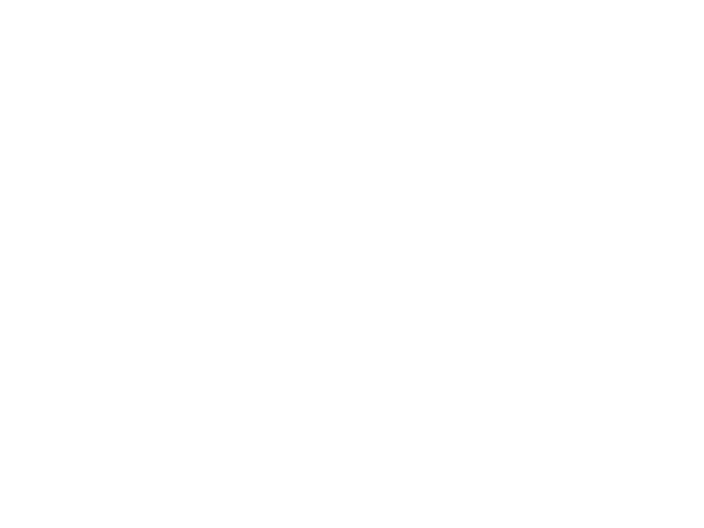

In [29]:
from mpl_toolkits import mplot3d

%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

xdata = finalDf['pc1']
ydata = finalDf['pc2']
zdata = finalDf['pc3']

ax.scatter3D(xdata, ydata, zdata, c=finalDf['overall_popularity'])


plt.show()

In [30]:
from sklearn.cluster import KMeans


In [31]:
X = finalDf.iloc[:, 0:3].values
X

array([[-0.7881511 ,  3.27457827,  1.54150544],
       [-1.14381247,  0.48918379, -0.24998459],
       [-0.37313036,  1.37497233,  0.18749526],
       ...,
       [ 0.38049793, -0.76807727, -0.55291745],
       [ 1.34477269, -0.36369009,  0.5969277 ],
       [ 0.93269866, -0.81657146, -0.31957014]])

In [32]:
# use the elbow method to determine the optimal number of clusters

wcss = []
for i in range(1 ,11):
    k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

plt.plot(np.arange(1,11), wcss)
plt.xlabel('Clusters')
plt.ylabel('SSE')

plt.show()

##### Note: Very high SSE occuring. Could be due to dimensional reduction. Optimal number of clusters appear at the elbow around 2 or 3. 

In [33]:
k_means_optimal = KMeans(n_clusters=3, init='k-means++', random_state=42)

y_predict = k_means_optimal.fit_predict(X)

print(y_predict)

[2 1 2 ... 1 0 0]


In [34]:
k_means_optimal.cluster_centers_

array([[ 2.36789774, -0.10508554, -0.01556662],
       [-0.68637199, -0.40347354, -0.15353593],
       [-0.69161386,  1.69862794,  0.61204429]])

In [35]:
finalDf['cluster'] = y

# Divide data into respective clusters

data1 = finalDf[finalDf.cluster == 0]

data2 = finalDf[finalDf.cluster == 1]

data3 = finalDf[finalDf.cluster == 2]



<IPython.core.display.Javascript object>


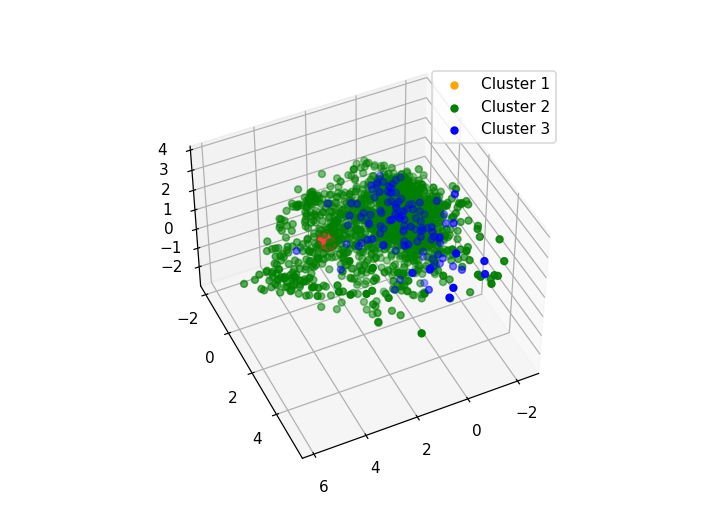

In [36]:
%matplotlib notebook 


kplot = plt.axes(projection='3d')

kplot.scatter3D(data1.pc1, data1.pc2, data1.pc3, c='orange', label = 'Cluster 1')
kplot.scatter3D(data2.pc1, data2.pc2, data2.pc3, c='green', label = 'Cluster 2')
kplot.scatter3D(data3.pc1, data3.pc2, data3.pc3, c='blue', label = 'Cluster 3')

kplot.scatter3D(k_means_optimal.cluster_centers_[:,0], k_means_optimal.cluster_centers_[:,1], k_means_optimal.cluster_centers_[:, 2 ], color = 'red', s = 200)
plt.legend()
